In [1]:
from gluoncv.data import VOCDetection

In [2]:
# 正确的读取方式
train_dataset = VOCDetection(root = '../../../data/VOCdevkit',splits=[(2012, 'train')]) # 这是在VOC2012\ImageSets\Main里面找对应名字的txt
val_dataset = VOCDetection(root = '../../../data/VOCdevkit', splits=[(2012, 'val')])

print('Training images:', len(train_dataset))
print('Validation images:', len(val_dataset))

Training images: 5717
Validation images: 5823


In [3]:
train_dataset

In [4]:
train_dataset.__getitem__(0) # 待标签的,此语句等同于train_dataset[0]

(
 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [202 205 248]
   [203 206 249]
   [204 207 250]]
 
  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [203 206 249]
   [203 206 249]
   [202 205 248]]
 
  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [206 209 252]
   [205 208 251]
   [205 208 251]]
 
  ...
 
  [[205 191 178]
   [194 180 167]
   [206 192 179]
   ...
   [137 128 119]
   [120 112 101]
   [119 113 101]]
 
  [[192 178 165]
   [193 179 166]
   [193 179 166]
   ...
   [111 106 100]
   [108 103  97]
   [122 119 110]]
 
  [[178 164 151]
   [180 166 153]
   [185 171 158]
   ...
   [ 82  77  73]
   [ 73  68  64]
   [ 80  77  70]]]
 <NDArray 442x500x3 @cpu(0)>, array([[ 52.,  86., 470., 419.,  12.,   0.],
        [157.,  43., 288., 166.,  14.,   0.]]))

In [9]:
train_dataset.__getitem__(6)

(
 [[[ 39  41  30]
   [ 34  35  39]
   [ 19  23  24]
   ...
   [ 55  61  59]
   [ 54  60  58]
   [ 55  61  59]]
 
  [[ 35  39  22]
   [ 39  44  38]
   [ 29  34  30]
   ...
   [ 56  62  60]
   [ 60  66  64]
   [ 54  60  58]]
 
  [[ 37  60  31]
   [ 33  51  35]
   [  8  20  10]
   ...
   [ 59  65  63]
   [ 65  71  69]
   [ 52  58  56]]
 
  ...
 
  [[214 213 221]
   [224 223 229]
   [220 219 224]
   ...
   [182 177 148]
   [180 175 145]
   [178 173 143]]
 
  [[223 225 220]
   [224 225 217]
   [214 214 202]
   ...
   [174 166 127]
   [172 165 123]
   [167 163 118]]
 
  [[171 177 149]
   [173 177 142]
   [161 162 122]
   ...
   [155 152 119]
   [153 150 115]
   [150 147 112]]]
 <NDArray 375x500x3 @cpu(0)>, array([[119.,   0., 202.,  34.,   1.,   0.],
        [116.,  37., 272., 120.,   1.,   0.],
        [205.,  73., 394., 236.,  14.,   0.],
        [ 23.,   1., 499., 187.,   3.,   0.],
        [  0., 186., 499., 281.,   3.,   0.]]))

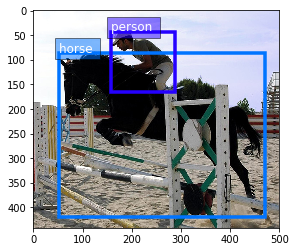

In [5]:
# plt看看
img0, label0 = train_dataset.__getitem__(0)
bboxes = label0[:,:4] # 也就是上面的52.,  86., 470., 419和157.,  43., 288., 166.
cids = label0[:,4:5] # 最后一个0是啥？？

%matplotlib inline
from matplotlib import pyplot as plt
from gluoncv.utils import viz

ax = viz.plot_bbox(
    img0.asnumpy(),
    bboxes,
    labels=cids,
    class_names=train_dataset.classes)
plt.show()

In [6]:
cids

array([[12.],
       [14.]])

In [7]:
label0[:,5:] # 这是啥

array([[0.],
       [0.]])

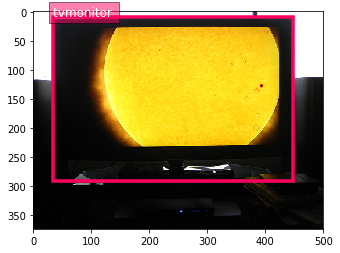

In [8]:
val_image, val_label = val_dataset[0]
bboxes = val_label[:, :4]
cids = val_label[:, 4:5]
ax = viz.plot_bbox(
    val_image.asnumpy(),
    bboxes,
    labels=cids,
    class_names=train_dataset.classes)
plt.show()

In [9]:
# 图像增广对于ssd网络来说很重要，下面就进行增广
from gluoncv.data.transforms import presets
from gluoncv import utils
from mxnet import nd

In [10]:
width, height = 512, 512  # 假设512*512大小
train_transform = presets.ssd.SSDDefaultTrainTransform(width, height)
val_transform = presets.ssd.SSDDefaultValTransform(width, height)

In [11]:
# 试试效果
_img0, _label0 = train_transform(img0, label0)
print('tensor shape:', _img0.shape) # 还把通道数放后面了
print('原来：', img0.shape)

tensor shape: (3, 512, 512)
原来： (442, 500, 3)


In [12]:
_img0


[[[ 2.1276248   2.1440527   2.1421344  ...  1.4059145   1.3767488
    1.3458692 ]
  [ 2.1166914   2.1349118   2.143327   ...  1.3894821   1.3782884
    1.3341411 ]
  [ 2.1036239   2.1237183   2.1413574  ...  1.3673979   1.3768137
    1.3274454 ]
  ...
  [-0.67089975  0.67829955  0.60905457 ...  0.6529283   0.8198538
    0.6092303 ]
  [-0.4541801   0.7162591   0.59303105 ...  0.68724465  0.7866608
    0.85575974]
  [-0.26655328  0.7672739   0.5776978  ...  0.61988777  0.6821296
    1.0473678 ]]

 [[ 2.3232117   2.3407493   2.3390763  ...  1.7056814   1.692731
    1.6605719 ]
  [ 2.316387    2.3312647   2.3401294  ...  1.6927627   1.6941555
    1.6485932 ]
  [ 2.308217    2.3205268   2.337981   ...  1.6751107   1.6924758
    1.6417675 ]
  ...
  [-1.337416    0.43162104  0.587393   ...  0.5271572   0.69732445
    0.48221287]
  [-1.140274    0.4649693   0.5765875  ...  0.55664605  0.6631164
    0.73352015]
  [-0.9606373   0.52269614  0.5786162  ...  0.48396456  0.55683255
    0.9295505 ]]

presets.ssd.SSDDefaultValTransform 类的`__init__`函数就会把图像标准化，如上所示

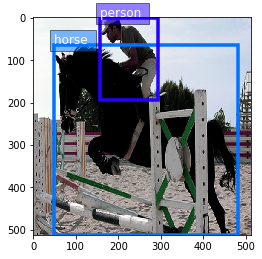

In [13]:
# 训练的时候还是不需要变的吧？？
# 它们不再位于（0，255）范围内，把它们转换回去，以便能清楚地看到
_img0 = _img0.transpose(
    (1, 2, 0)) * nd.array((0.229, 0.224, 0.225)) + nd.array((0.485, 0.456, 0.406))
_img0 = (_img0 * 255).clip(0, 255)
ax = viz.plot_bbox(_img0.asnumpy(), _label0[:, :4],
                   labels=_label0[:, 4:5],
                   class_names=train_dataset.classes)
plt.show()

In [23]:
# 数据加载器
from gluoncv.data.batchify import Tuple, Stack, Pad
from mxnet.gluon.data import DataLoader

batch_size = 2 # 试运行，弄小点方便看 .训练时调大点。比如128
# you can make it larger(if your CPU has more cores) to accelerate data loading
num_workers = 4 # 4线程CPU被跑满了

# behavior of batchify_fn: stack images, and pad labels
batchify_fn = Tuple(Stack(), Pad(pad_val=-1))
train_loader = DataLoader(
    train_dataset.transform(train_transform),
    batch_size,
    shuffle=True,
    batchify_fn=batchify_fn,
    last_batch='rollover',
    num_workers=num_workers) # 是否多线程
val_loader = DataLoader(
    val_dataset.transform(val_transform),
    batch_size,
    shuffle=False,
    batchify_fn=batchify_fn,
    last_batch='keep',
    num_workers=num_workers)

for ib, batch in enumerate(train_loader):
    if ib > 3: # 只打印前4个出来看看
        break
    print('data:', batch[0].shape, 'label:', batch[1].shape)

data: (2, 3, 512, 512) label: (2, 9, 6)
data: (2, 3, 512, 512) label: (2, 1, 6)
data: (2, 3, 512, 512) label: (2, 2, 6)
data: (2, 3, 512, 512) label: (2, 1, 6)


In [15]:
# 此时内存都占了80%+了，可以删除一些数据变量了。咋这么小？内存还占那么多
import sys
print(sys.getsizeof(train_dataset)/1024, 'MB')

0.0546875 MB


In [32]:
from gluoncv import model_zoo
# pretrained_base = True 会加载模型
net = model_zoo.get_model('ssd_300_vgg16_atrous_voc', pretrained_base=True)
print(net)

Model file is not found. Downloading.


100%|██████████████████████████████████| 74364/74364 [00:14<00:00, 5157.36KB/s]


SSD(
  (features): VGGAtrousExtractor(
    (stages): HybridSequential(
      (0): HybridSequential(
        (0): Conv2D(3 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): Activation(relu)
        (2): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): Activation(relu)
      )
      (1): HybridSequential(
        (0): Conv2D(64 -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): Activation(relu)
        (2): Conv2D(128 -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): Activation(relu)
      )
      (2): HybridSequential(
        (0): Conv2D(128 -> 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): Activation(relu)
        (2): Conv2D(256 -> 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): Activation(relu)
        (4): Conv2D(256 -> 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (5): Activation(relu)
      )
      (3): HybridSequential(
    

In [27]:
from gluoncv.loss import SSDMultiBoxLoss
from mxnet import gluon, autograd
# net.initialize() # 需要初始化才能用
mbox_loss = SSDMultiBoxLoss()
trainer = gluon.Trainer(
    net.collect_params(), 'sgd',
    {'learning_rate': 0.001, 'wd': 0.0005, 'momentum': 0.9})

for ib, batch in enumerate(train_loader):
    if ib > 0: # 看看第一个样本输入ssd网络会得到什么
        break
    with autograd.record(): # 只打印的话，暂时都不需要记录梯度
        cls_pred, box_pred, anchors = net(batch[0])
    print('data:', batch[0].shape)
    print('class targets:', cls_pred.shape) # 一共21个类
    print('box targets:', box_pred.shape) 
    print('anchors:', anchors.shape)

data: (2, 3, 512, 512)
class targets: (2, 24656, 21)
box targets: (2, 24656, 4)
anchors: (1, 24656, 4)


In [31]:

batch[1] # 这还包含分类信息


[[[262.44238 351.35223 280.07416 375.19028   9.        0.     ]
  [398.07153 349.27936 418.4159  371.04453   9.        0.     ]
  [314.6596  351.35223 330.9351  373.1174    9.        1.     ]
  [284.8212  347.20648 296.34967 363.78946   9.        0.     ]]

 [[  0.      275.86206 506.82828 512.       10.        0.     ]
  [ -1.       -1.       -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.       -1.       -1.     ]]]
<NDArray 2x4x6 @cpu_shared(0)>

In [ ]:
# 训练
from gluoncv.loss import SSDMultiBoxLoss
from mxnet import gluon, autograd
import mxnet as mx

ctx = mx.gpu()
net.initialize(init=init.Xavier(), ctx=ctx)
mbox_loss = SSDMultiBoxLoss()
trainer = gluon.Trainer(
    net.collect_params(), 'sgd',
    {'learning_rate': 0.001, 'wd': 0.0005, 'momentum': 0.9})

for epoch in range(20):
    train_l_sum, train_acc_sum, n, m, start = 0.0, 0.0, 0, 0, time.time()
    train_loader.reset()  # 从头读取数据
    for ib, batch in enumerate(train_loader):
        with autograd.record(): # 只打印的话，暂时都不需要记录梯度
           cls_pred, box_pred, anchors = net(batch[0])
           
